# 決定木のパラメータ
<iframe width="560" height="315" src="https://www.youtube.com/embed/AOEtom_l3Wk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

```{hint}
- [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)
- [parrt/dtreeviz](https://github.com/parrt/dtreeviz)
```

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if str(get_ipython()).startswith("<google.colab."):
    !pip install dtreeviz

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
from dtreeviz.trees import dtreeviz, rtreeviz_bivar_3D

In [3]:
# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# 乱数
import numpy as np

np.random.seed(777)

# シンプルなデータに決定木を当てはめてみる

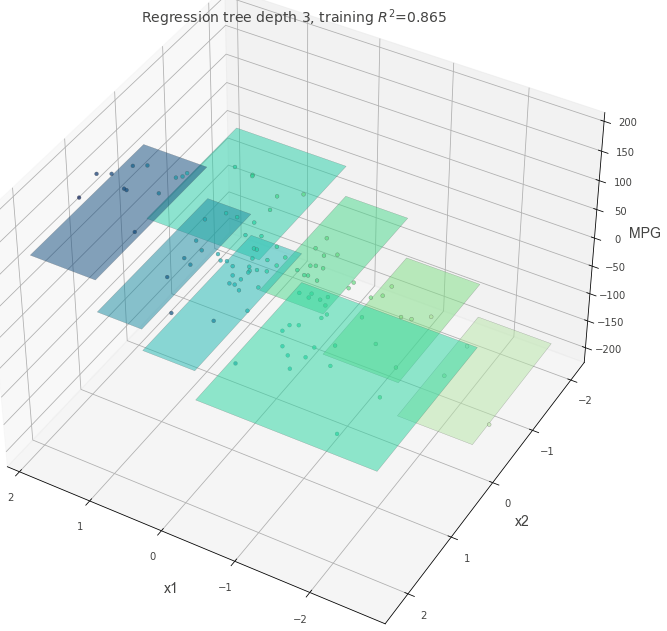

In [4]:
# サンプルデータ
X, y = make_regression(n_samples=100, n_features=2, random_state=11)

# 決定木を学習
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X, y)

# 可視化
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
t = rtreeviz_bivar_3D(
    dt,
    X,
    y,
    feature_names=["x1", "x2"],
    target_name="MPG",
    elev=40,
    azim=120,
    dist=8.0,
    show={"splits", "title"},
    ax=ax,
)
plt.show()

# いろいろなパラメタの決定木を学習してみる
少し複雑な構造を持つデータに対して、決定木のパラメタを変えた時にどのような挙動になるかを確認してみる。
はじめに、`max_depth=3`以外がすべてデフォルト値の決定木を確認する。

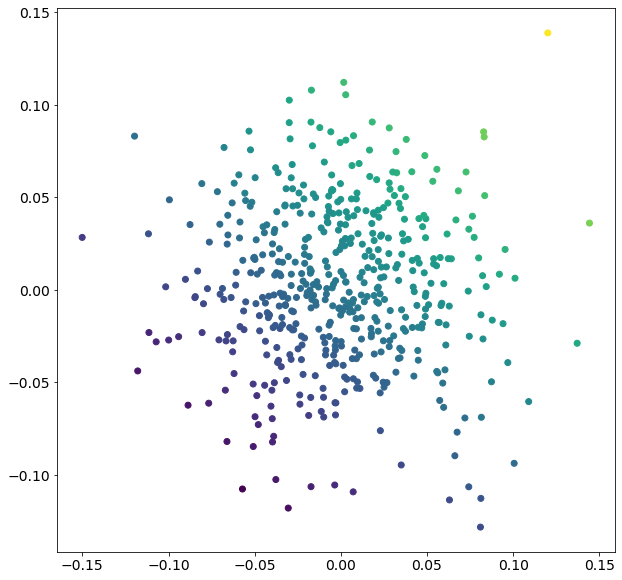

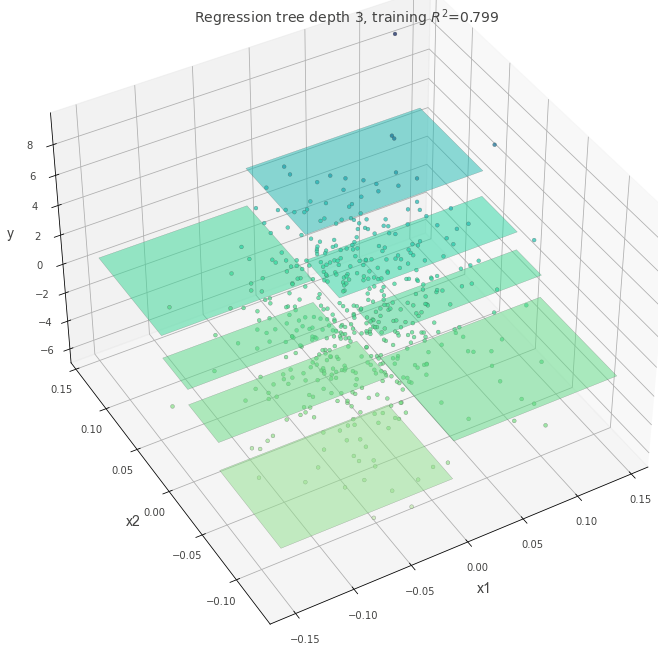

In [5]:
# サンプルデータ
X, y = make_regression(
    n_samples=500, n_features=2, effective_rank=4, noise=0.1, random_state=1
)
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# 決定木を学習
dt = DecisionTreeRegressor(max_depth=3, random_state=117117)
dt.fit(X, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
t = rtreeviz_bivar_3D(
    dt,
    X,
    y,
    feature_names=["x1", "x2"],
    target_name="y",
    elev=40,
    azim=240,
    dist=8.0,
    show={"splits", "title"},
    ax=ax,
)
plt.show()

## max_depth = 10
`max_depth`の値が大きい時

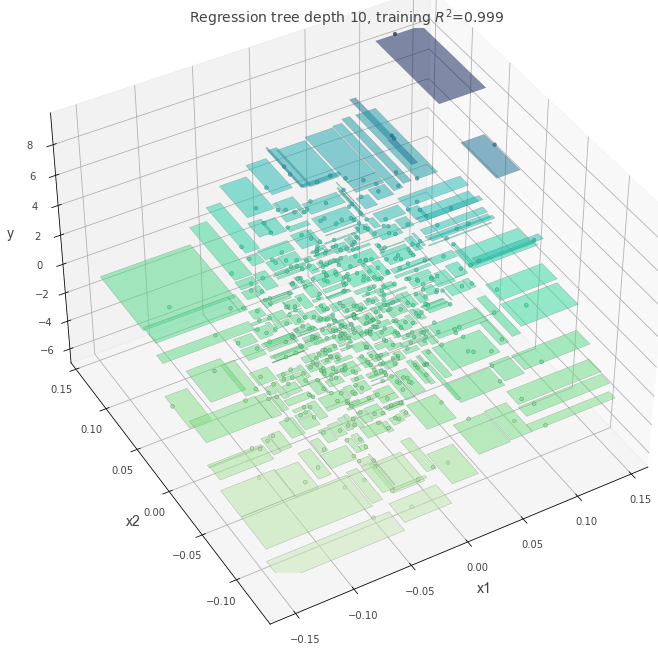

In [6]:
dt = DecisionTreeRegressor(max_depth=10, random_state=117117)
dt.fit(X, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
t = rtreeviz_bivar_3D(
    dt,
    X,
    y,
    feature_names=["x1", "x2"],
    target_name="y",
    elev=40,
    azim=240,
    dist=8.0,
    show={"splits", "title"},
    ax=ax,
)
plt.show()

## max-depth=5

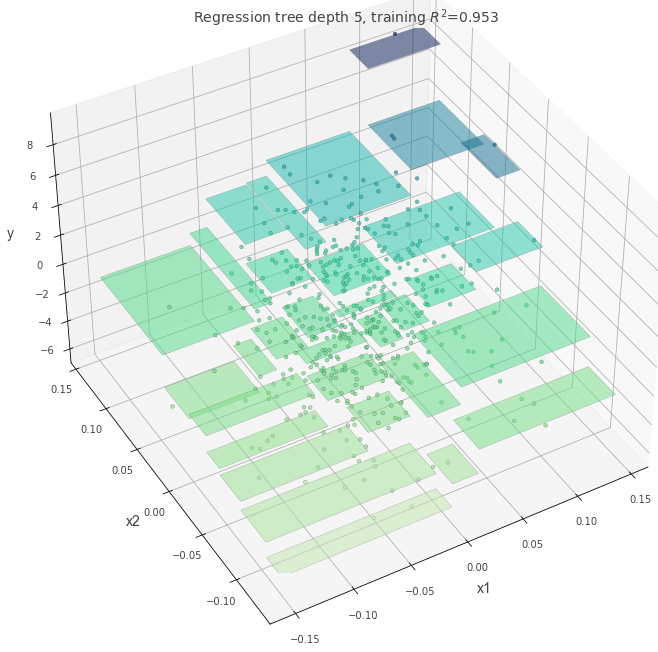

In [7]:
dt = DecisionTreeRegressor(max_depth=5, random_state=117117)
dt.fit(X, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
t = rtreeviz_bivar_3D(
    dt,
    X,
    y,
    feature_names=["x1", "x2"],
    target_name="y",
    elev=40,
    azim=240,
    dist=8.0,
    show={"splits", "title"},
    ax=ax,
)
plt.show()

## min_samples_split=60

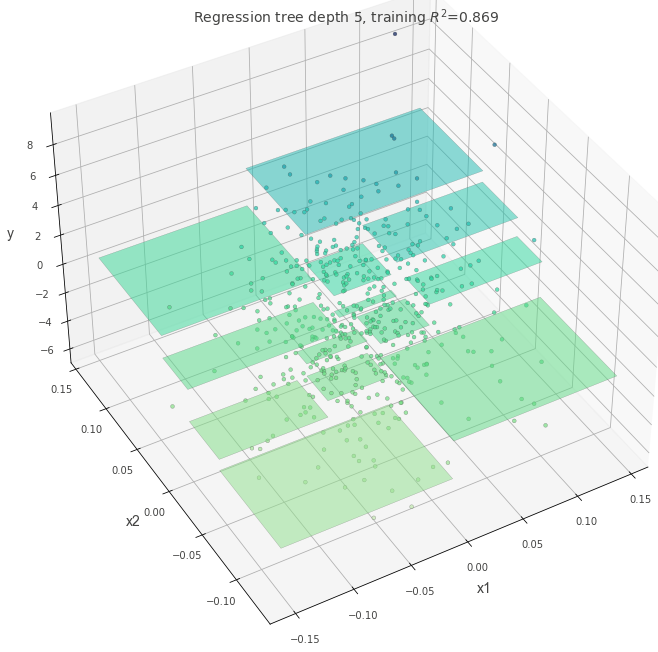

In [8]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=60, random_state=117117)
dt.fit(X, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
t = rtreeviz_bivar_3D(
    dt,
    X,
    y,
    feature_names=["x1", "x2"],
    target_name="y",
    elev=40,
    azim=240,
    dist=8.0,
    show={"splits", "title"},
    ax=ax,
)
plt.show()

## ccp_alpha=0.4
`ccp_alpha`を設定すると、値が大きいほどシンプルな木が作成される。

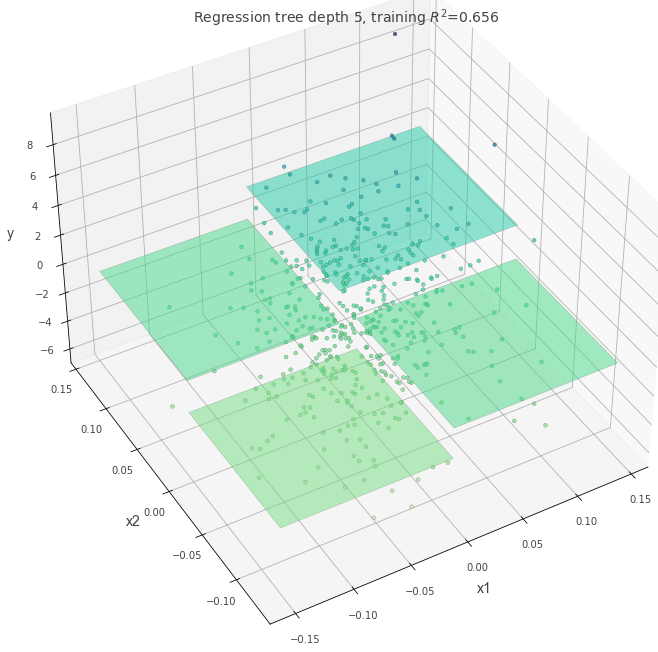

In [9]:
dt = DecisionTreeRegressor(max_depth=5, random_state=117117, ccp_alpha=0.4)
dt.fit(X, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
t = rtreeviz_bivar_3D(
    dt,
    X,
    y,
    feature_names=["x1", "x2"],
    target_name="y",
    elev=40,
    azim=240,
    dist=8.0,
    show={"splits", "title"},
    ax=ax,
)
plt.show()

## max_leaf_nodes=5
`max_leaf_nodes`の数が、区画の数と一致していることが確認できる。

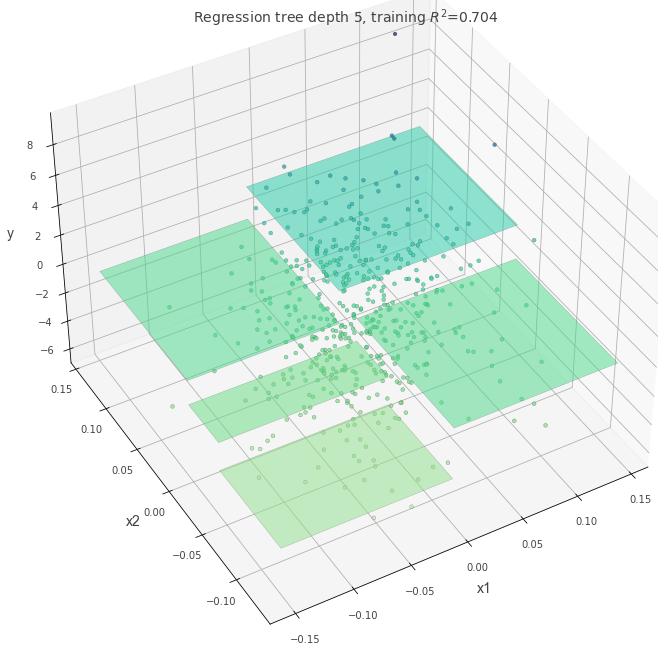

In [10]:
dt = DecisionTreeRegressor(max_depth=5, random_state=117117, max_leaf_nodes=5)
dt.fit(X, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
t = rtreeviz_bivar_3D(
    dt,
    X,
    y,
    feature_names=["x1", "x2"],
    target_name="y",
    elev=40,
    azim=240,
    dist=8.0,
    show={"splits", "title"},
    ax=ax,
)
plt.show()

# 外れ値がある場合
外れ値がある状態で、`criterion="squared_error"`を指定した場合に木にどのような変化があるかを確認する。

In [11]:
# 外れ値として、一部のデータの値を5倍にする
X, y = make_regression(n_samples=100, n_features=2, random_state=11)
y[1:20] = y[1:20] * 5

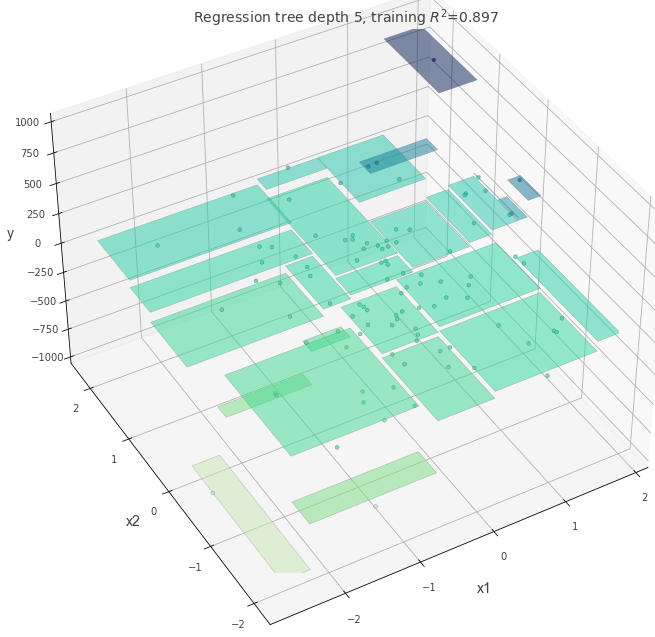

In [12]:
dt = DecisionTreeRegressor(max_depth=5, random_state=117117, criterion="absolute_error")
dt.fit(X, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
t = rtreeviz_bivar_3D(
    dt,
    X,
    y,
    feature_names=["x1", "x2"],
    target_name="y",
    elev=40,
    azim=240,
    dist=8.0,
    show={"splits", "title"},
    ax=ax,
)
plt.show()

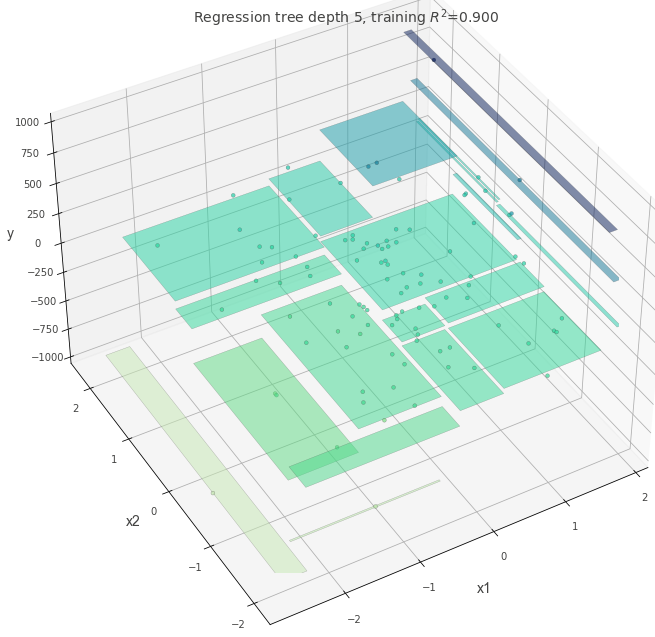

In [13]:
dt = DecisionTreeRegressor(max_depth=5, random_state=117117, criterion="squared_error")

dt.fit(X, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
t = rtreeviz_bivar_3D(
    dt,
    X,
    y,
    feature_names=["x1", "x2"],
    target_name="y",
    elev=40,
    azim=240,
    dist=8.0,
    show={"splits", "title"},
    ax=ax,
)
plt.show()